# Import Required Libraries

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import os
os.chdir('D:\Projects\End_To_End Projects\ML Project 3(Fake_News_Detector)')


# Load the Data

In [2]:
# Read all the  files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Examine the Data

In [3]:
train.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [4]:
test.head(10)

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
5,20805,Trump is USA's antique hero. Clinton will be n...,NaN,Trump is USA's antique hero. Clinton will be n...
6,20806,Pelosi Calls for FBI Investigation to Find Out...,Pam Key,"Sunday on NBC’s “Meet the Press,” House Minori..."
7,20807,Weekly Featured Profile – Randy Shannon,Trevor Loudon,You are here: Home / *Articles of the Bound* /...
8,20808,Urban Population Booms Will Make Climate Chang...,NaN,Urban Population Booms Will Make Climate Chang...
9,20809,NaN,cognitive dissident,don't we have the receipt?


# Check the shape of data

In [5]:
print('train shape:{}\ntest shape:{}'.format(train.shape,test.shape))

train shape:(20800, 5)
test shape:(5200, 4)


# Check the null values

In [6]:
train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [7]:
test.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

# Fill the null values

In [8]:
# Fill the null values to empty.
train = train.fillna(' ')
test = test.fillna(' ')

# Check for duplicates

In [9]:
train.duplicated().sum()

0

In [10]:
test.duplicated().sum()

0

# Make a new Column


In [11]:
# Add the three columns into total
train['total'] = train['title']+' '+train['author']+' '+train['text']
test['total'] = test['title']+' '+test['author']+' '+test['text']

In [12]:
# Check the data how its look like now
train.head()

,id,title,author,text,label,total
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


In [13]:
test.head()

,id,title,author,text,total
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...","Specter of Trump Loosens Tongues, if Not Purse..."
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,#NoDAPL: Native American Leaders Vow to Stay A...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...","Tim Tebow Will Attempt Another Comeback, This ..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,Keiser Report: Meme Wars (E995) Truth Broadcas...


In [14]:
# Check  total  column how  many values it contains
train['total'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It Darrell Lucus House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members o

In [ ]:
# Now manipulate the data
# Find the real or fake words based on the label values.
real_words = ''
fake_words = ''
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in train[train['label']==1].total: 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    real_words += " ".join(tokens)+" "

for val in train[train['label']==0].total: 
      
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    fake_words += " ".join(tokens)+" "

# Make a visual of wordcloud

In [ ]:
wordcloud = WordCloud(width = 800,height = 800,stopwords = stopwords,min_font_size = 10,background_color = 'white')

In [ ]:
wordcloud.generate(real_words)

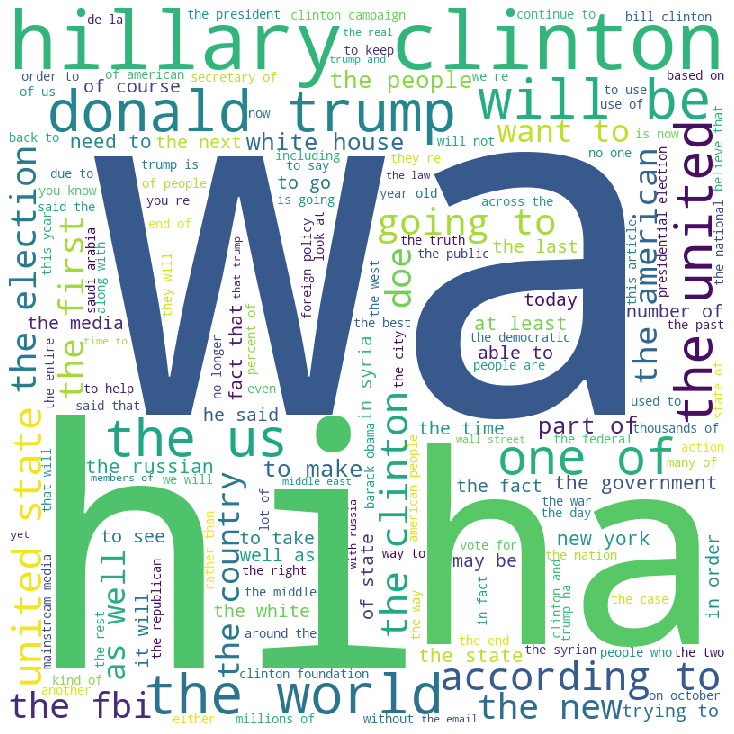

In [44]:
# Plot the wordcloud image.
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

# Cleaning and Processing

# 1. Regex

In [ ]:
# Remove puctuations from the string
string = "!</> OH Hi MR. trumph$%$!!##$%%@@ How Are you??$%%%&$"

In [ ]:
import re
re.sub(r'[^\w\s]','',string)

In [ ]:
# Download NLTK data
nltk.download('punkt')

# 2. Tokenization

In [ ]:
nltk.word_tokenize('Hello Uttam Grade Data Scientist How Are You')

# 3. StopWords

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stop_words = stopwords.words('english')
print(stop_words)

In [ ]:
sentence = 'Corona Virus has impacted i many countries and economy has down.'

In [ ]:
words = nltk.word_tokenize(sentence)

In [ ]:
words = [i for i in words if i in stop_words]

# 4. Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
input_str = 'I have done my PostGraduation From NIT Warangal'

In [ ]:
# TOkennize the Sentence
input_str = nltk.word_tokenize(input_str)
for word in input_str:
    print(lemma.lemmatize(word))

# Apply

In [ ]:
lemma = WordNetLemmatizer()
for index , row in train.iterrows():
    filter_sentence = ''
    sentence = row['total']
    sentence = re.sub(r'[^\w\s]','',sentence) # Clean the data
    words = nltk.word_tokenize(sentence) # Tokenize
    for word in words:
        filter_sentence = filter_sentence + '' + str(lemma.lemmatize(word)).lower()
    train.loc[index, 'total'] = filter_sentence

In [ ]:
train = train[['total','label']]

# NLP Tecniques

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
X_train = train['total']
Y_train = train['label']

# Bag of Words/ CountVectorizer

In [ ]:
corpus = ['This is first Document',
         'This is second Document',
         'and this is third one',
         'and This is fourth one']

vectorizer = CountVectorizer()
x = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

In [ ]:
x.toarray()

# TF-IDF Vectorizer

In [ ]:
def vectorize_text(features, max_features):
    vectorizer = TfidfVectorizer(stop_words = 'english',
                                 decode_error = 'strict',analyzer = 'word',ngram_range = (1,2),max_features = max_features)
    feature_vec = vectorizer.fit_transform(features)
    return feature_vec.toarray()

In [ ]:
tfidf_features = vectorize_text(['Oh Hi Uttam Grade I heard about you a lot','You are a Data Science into a Google'],30)

In [ ]:
tfidf_features

# # Apply

In [ ]:
# Feature Extraction using using Count Vectorizer
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_train)
freq_term_matrix = count_vectorizer.transform(X_train)
tfidf = TfidfTransformer(norm = 'l2')
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [42]:
tf_idf_matrix

<20800x20780 sparse matrix of type '<class 'numpy.float64'>'
	with 20891 stored elements in Compressed Sparse Row format>

# Modelling

In [50]:
test_counts = count_vectorizer.transform(train['total'].values)
test_idf = tfidf.transform(test_counts)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, Y_train, random_state=0)

# Logistic Regression

In [56]:
from sklearn.metrics import confusion_matrix
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)
print('Accuracy of Lasso classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Lasso classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))
from sklearn.naive_bayes import MultinomialNB
cm = confusion_matrix(y_test, pred)
cm

Accuracy of Lasso classifier on training set: 1.00
Accuracy of Lasso classifier on test set: 0.50


array([[2564,    0],
       [2592,   44]], dtype=int64)

# MultinomialNB

In [63]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(X_train, y_train)
pred = NB.predict(X_test)
print('Accuracy of NB  classifier on training set: {:.2f}'
     .format(NB.score(X_train, y_train)))
print('Accuracy of NB classifier on test set: {:.2f}'
     .format(NB.score(X_test, y_test)))
cm = confusion_matrix(y_test, pred)
cm

Accuracy of NB  classifier on training set: 1.00
Accuracy of NB classifier on test set: 0.50


array([[2564,    0],
       [2592,   44]], dtype=int64)

# Pipeline

In [64]:
#Assiging the variables again as once transformed vectors can't be transformed again using pipeline.
X_train = train['total']
Y_train = train['label']

In [70]:
from sklearn.pipeline import Pipeline
import joblib
from sklearn import linear_model
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [71]:
pipeline = Pipeline([('CounterVec',CountVectorizer())
                    ,('TFIDF',TfidfTransformer(norm = 'l2')),
                    ('Linear_Model',linear_model.LogisticRegression(C=1e5))])

In [73]:
pipeline.fit(X_train,Y_train)

Pipeline(steps=[('CounterVec', CountVectorizer()),
                ('TFIDF', TfidfTransformer()),
                ('Linear_Model', LogisticRegression(C=100000.0))])

In [74]:
pipeline.predict(["flynn hillary clinton big woman campus breitbart daniel j flynnever get feeling life circle roundabout rather head straight line toward intended destination hillary clinton remains big woman campus leafy liberal wellesley massachusetts everywhere else vote likely inauguration dress remainder day way miss havisham forever wore wedding dress speaking great expectations hillary rodham overflowed 48 year ago first addressed wellesley graduating class the president college informed gathered 1969 student needed debate far i could ascertain spokesman kind like democratic primary 2016 minus term unknown even seven sisters school i glad miss adams made clear i speaking today u 400 u miss rodham told classmate after appointing edger bergen charlie mccarthys mortimer snerds attendance bespectacled granny glass awarding matronly wisdom least john lennon wisdom took issue previous speaker despite becoming first win election seat u s senate since reconstruction edward brooke came criticism calling empathy goal protestors criticized tactic though clinton senior thesis saul alinsky lamented black power demagogue elitist arrogance repressive intolerance within new left similar word coming republican necessitated brief rebuttal trust rodham ironically observed 1969 one word i asked class rehearsal wanted say everyone came said talk trust talk lack trust u way feel others talk trust bust what say what say feeling permeates generation perhaps even understood distrusted the trust bust certainly busted clintons 2016 plan she certainly even understand people distrusted after whitewater travelgate vast conspiracy benghazi missing email clinton found distrusted voice friday there load compromising road broadening political horizon and distrust american people trump edged 48 percent 38 percent question immediately prior novembers election stood major reason closing horizon clinton described vanquisher supporter embracing lie con alternative fact assault truth reason she failed explain american people chose lie truth as history major among today know well people power invent fact attack question mark beginning end free society offered that hyperbole like many people emerge 1960s hillary clinton embarked upon long strange trip from high school goldwater girl wellesley college republican president democratic politician clinton drank time place gave degree more significantly went idealist cynic comparison two wellesley commencement address show way back lamented long leader viewed politics art possible challenge practice politics art making appears impossible possible now big woman campus odd woman white house wonder current station even possible why arent i 50 point ahead asked september in may asks isnt president the woman famously dubbed congenital liar bill safire concludes lie mind getting stood election day like finding jilted bride wedding day inspires dangerous delusion"])

array([0], dtype=int64)

In [75]:
#Save the Pipeline
filename = 'pipeline.sav'
joblib.dump(pipeline,filename)

['pipeline.sav']

# Prediction

In [76]:
loaded_model = joblib.load(filename)
result = loaded_model.predict(["flynn hillary clinton big woman campus breitbart daniel j flynnever get feeling life circle roundabout rather head straight line toward intended destination hillary clinton remains big woman campus leafy liberal wellesley massachusetts everywhere else vote likely inauguration dress remainder day way miss havisham forever wore wedding dress speaking great expectations hillary rodham overflowed 48 year ago first addressed wellesley graduating class the president college informed gathered 1969 student needed debate far i could ascertain spokesman kind like democratic primary 2016 minus term unknown even seven sisters school i glad miss adams made clear i speaking today u 400 u miss rodham told classmate after appointing edger bergen charlie mccarthys mortimer snerds attendance bespectacled granny glass awarding matronly wisdom least john lennon wisdom took issue previous speaker despite becoming first win election seat u s senate since reconstruction edward brooke came criticism calling empathy goal protestors criticized tactic though clinton senior thesis saul alinsky lamented black power demagogue elitist arrogance repressive intolerance within new left similar word coming republican necessitated brief rebuttal trust rodham ironically observed 1969 one word i asked class rehearsal wanted say everyone came said talk trust talk lack trust u way feel others talk trust bust what say what say feeling permeates generation perhaps even understood distrusted the trust bust certainly busted clintons 2016 plan she certainly even understand people distrusted after whitewater travelgate vast conspiracy benghazi missing email clinton found distrusted voice friday there load compromising road broadening political horizon and distrust american people trump edged 48 percent 38 percent question immediately prior novembers election stood major reason closing horizon clinton described vanquisher supporter embracing lie con alternative fact assault truth reason she failed explain american people chose lie truth as history major among today know well people power invent fact attack question mark beginning end free society offered that hyperbole like many people emerge 1960s hillary clinton embarked upon long strange trip from high school goldwater girl wellesley college republican president democratic politician clinton drank time place gave degree more significantly went idealist cynic comparison two wellesley commencement address show way back lamented long leader viewed politics art possible challenge practice politics art making appears impossible possible now big woman campus odd woman white house wonder current station even possible why arent i 50 point ahead asked september in may asks isnt president the woman famously dubbed congenital liar bill safire concludes lie mind getting stood election day like finding jilted bride wedding day inspires dangerous delusion"])
print(result)

[0]
